In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

data_path='/content/gdrive/My Drive/Colab Notebooks/Copy of Copy of dataset'
categories = os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

label_dict

{'with_mask': 0, 'without_mask': 1}

In [ ]:
from keras.preprocessing import image
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names= os.listdir(folder_path)

    for img_name in img_names:

        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(100,100))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)


In [ ]:

def new_target():
    global new
    new = Toplevel()
    np.save('data',data)
np.save('target',new_target)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=data.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))




# New Section

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,train_size=0.1,test_size=0.25)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=model.fit(
  train_data,
  train_target,
  epochs=15,
  callbacks=[checkpoint],
  validation_split=0.2)


Epoch 1/15
4/4 [==============================] - 5s 1s/step - loss: 0.6932 - acc: 0.4561 - val_loss: 0.6880 - val_acc: 0.5517
Epoch 2/15
4/4 [==============================] - 3s 978ms/step - loss: 0.6961 - acc: 0.5088 - val_loss: 0.6855 - val_acc: 0.6207
Epoch 3/15
4/4 [==============================] - 3s 971ms/step - loss: 0.6830 - acc: 0.6491 - val_loss: 0.6837 - val_acc: 0.5172
Epoch 4/15
4/4 [==============================] - 3s 991ms/step - loss: 0.6768 - acc: 0.5702 - val_loss: 0.6787 - val_acc: 0.6552
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.6893 - acc: 0.5263 - val_loss: 0.6749 - val_acc: 0.6552
Epoch 6/15
4/4 [==============================] - 3s 986ms/step - loss: 0.6734 - acc: 0.6579 - val_loss: 0.6727 - val_acc: 0.6207
Epoch 7/15
4/4 [==============================] - 3s 978ms/step - loss: 0.6616 - acc: 0.6667 - val_loss: 0.6676 - val_acc: 0.6207
Epoch 8/15
4/4 [==============================] - 3s 976ms/step - loss: 0.6527 - acc: 0.6842 - v

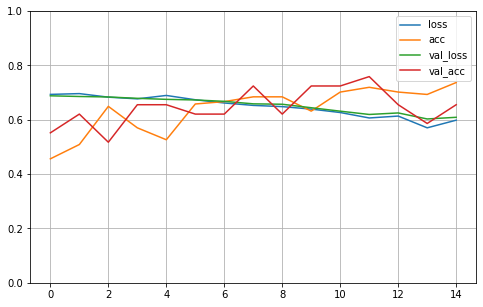

<Figure size 576x432 with 0 Axes>

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


figure = plt.gcf()
figure.set_size_inches(8, 6)
#plt.savefig('filename.png', bbox_inches='tight')
plt.savefig('loss_accuracy_graph.png',dpi=300, bbox_inches='tight')

In [ ]:
model.save("model_v3.h5")

In [ ]:
print(model.evaluate(test_data,test_target))

12/12 [==============================] - 1s 120ms/step - loss: 0.5720 - acc: 0.6955
[0.572023868560791, 0.6955307126045227]


### Accuracy : 97.83%

In [ ]:
new=test_data[:5]

In [ ]:
y_pred = model.predict(new)


print(y_pred)
print(label_dict)

[[0.32302532]
 [0.19257644]
 [0.2824469 ]
 [0.44530284]
 [0.4464444 ]]
{'with_mask': 0, 'without_mask': 1}


AxesImage(54,36;334.8x217.44)


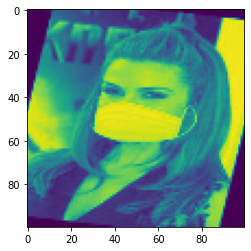

In [ ]:
print(plt.imshow(test_data[0].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


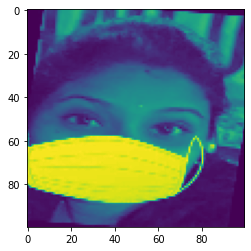

In [ ]:
print(plt.imshow(test_data[1].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


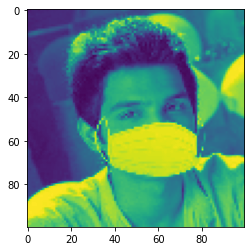

In [ ]:
print(plt.imshow(test_data[2].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


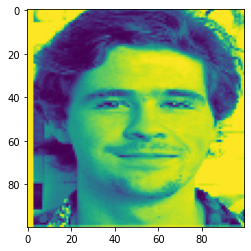

In [ ]:
print(plt.imshow(test_data[3].reshape(100,100)))